In [1]:
import numpy as np 
import pandas as pd

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [7]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [8]:
data["Geography_Germany"]=data["Geography_Germany"].astype('float32')
data["Geography_Spain"]=data["Geography_Spain"].astype('float32')
data["Gender_Male"]=data["Gender_Male"].astype('float32')

In [9]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=data.drop(columns=['Exited']) 
y=data['Exited']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)



In [13]:
x_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

c:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="binary_crossentropy",optimizer="adam")
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5033
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4747
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4528
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4445
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4378
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4308
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4418
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4307
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4275
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4328


In [18]:
model.layers[0].get_weights()

[array([[ 0.33337054,  0.08250472, -0.15695725],
        [-1.1662372 , -1.3690302 , -1.5269682 ],
        [-0.08715644,  0.13698378,  0.048587  ],
        [-0.0676841 , -0.07828879, -0.69553053],
        [-0.1017719 , -0.18364309,  0.5613117 ],
        [-0.06545666, -0.08329975,  0.27830902],
        [ 0.6730359 ,  0.5813863 ,  0.70309216],
        [-0.19213331,  0.20438072, -0.17771222],
        [-0.89068747, -0.42646995, -0.15129203],
        [ 0.02693147,  0.24054529, -0.24410373],
        [ 0.15150051,  0.56045055,  0.5261203 ]], dtype=float32),
 array([0.14041355, 0.13243188, 0.14126968], dtype=float32)]

In [21]:
model.layers[1].get_weights() 

[array([[-0.92873996],
        [-1.1208922 ],
        [-1.227819  ]], dtype=float32),
 array([0.09134913], dtype=float32)]

In [24]:
y_log=model.predict(x_test_scaled)
y_pridect=np.where(test_predict>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
y_pridect

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [28]:
from sklearn.metrics import accuracy_score
acucuracy=accuracy_score(y_test,y_pridect)
print("Accuracy :",acucuracy)

Accuracy : 0.8


# Improving model 

In [29]:
model.add(Dense(30,activation="relu",input_dim=11))
model.add(Dense(5,activation="relu",input_dim=30))
model.add(Dense(1,activation="relu"))


c:\Users\Adeel\Desktop\Deep Learning\Deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343 (1.34 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)

In [39]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(x_train_scaled,y_train,epochs=30,validation_split=.2)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8463 - loss: 0.3884 - val_accuracy: 0.8238 - val_loss: 0.4100
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8430 - loss: 0.3944 - val_accuracy: 0.8225 - val_loss: 0.4104
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8428 - loss: 0.3984 - val_accuracy: 0.8225 - val_loss: 0.4102
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8409 - loss: 0.4035 - val_accuracy: 0.8231 - val_loss: 0.4110
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8434 - loss: 0.3935 - val_accuracy: 0.8231 - val_loss: 0.4125
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8335 - loss: 0.4104 - val_accuracy: 0.8231 - val_loss: 0.4108
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8342 - loss: 0.4104 - val_accuracy: 0.8250 - val_loss: 0.4098
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8402 - loss: 0.3967 - val_accuracy: 0.

In [40]:
model.layers[0].get_weights()

[array([[-0.05053163,  0.07410903,  0.11730855],
        [ 0.2556368 , -3.0962663 , -2.6336772 ],
        [ 0.2772937 , -0.11309135, -0.08370291],
        [-0.21573882,  0.4274343 , -1.0742679 ],
        [ 0.05325483,  0.05386565,  0.24172118],
        [ 0.27185047, -0.17510028,  0.16146168],
        [ 2.1359503 , -0.9482188 , -0.21036392],
        [ 0.07216689,  0.06973021, -0.392221  ],
        [-0.6442828 , -0.12888229, -0.76154155],
        [ 0.01210761, -0.21852401,  0.06030894],
        [ 0.6460139 , -0.03715806,  0.685165  ]], dtype=float32),
 array([-0.68549544,  0.36419696, -0.7859889 ], dtype=float32)]

In [41]:
model.layers[1].get_weights()

[array([[-1.5586941],
        [-1.3068833],
        [-1.1291893]], dtype=float32),
 array([0.1367389], dtype=float32)]

In [42]:
model.layers[2].get_weights()

[array([[ 0.08129444,  0.35853788,  0.4295701 ,  0.24879974,  0.29914927,
         -0.09673339,  0.3476456 , -0.10954511,  0.40789387,  0.48560283,
         -0.43019798, -0.14362225, -0.37690634, -0.02927831, -0.28007716,
         -0.14097515,  0.4642688 ,  0.53122914, -0.13563707, -0.33968636,
         -0.17201415, -0.04475895, -0.37604687,  0.01152849, -0.42636794,
          0.10486472,  0.08362903,  0.28291106, -0.30931833, -0.22984913]],
       dtype=float32),
 array([-0.04359757, -0.11513364, -0.07432172, -0.08097222, -0.09636333,
         0.        , -0.11155177,  0.        , -0.0083861 , -0.02309157,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.00968256, -0.03107169,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.01327224,  0.        ,
        -0.05659551, -0.04504728, -0.05410992,  0.        ,  0.        ],
       dtype=float32)]

In [43]:
y_log=model.predict(x_test_scaled)
y_predict=np.where(y_log>0.5,1,0)
print(y_predict)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [44]:
accuracy=accuracy_score(y_test,y_predict)
print("Accuracy :",accuracy)    

Accuracy : 0.8355


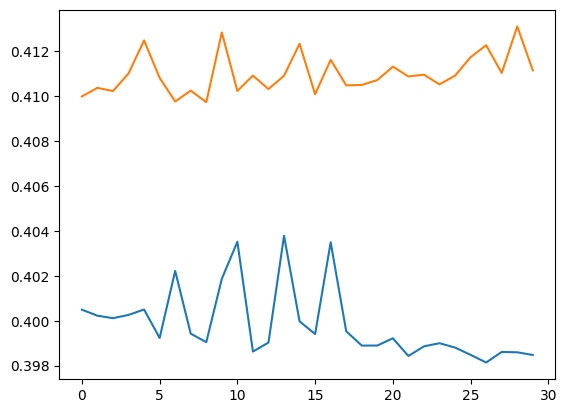

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

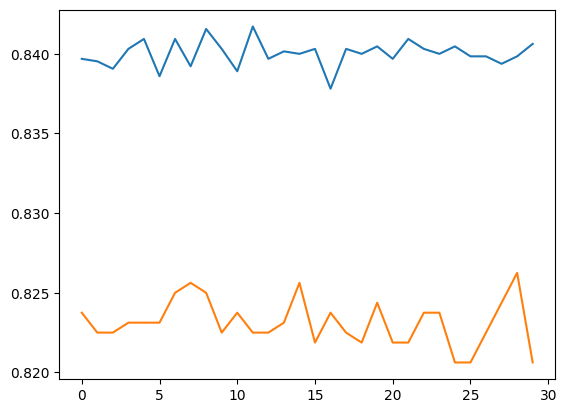

In [57]:
plt.plot(history.history['accuracy'])   
plt.plot(history.history['val_accuracy'])